In [53]:
import requests
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
# Api sur le facteur de charge et le taux de couverture
base_url = 'https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records'

In [55]:
offset = 0
limit = 100
all_data = []

In [56]:
while True:
    url = f'{base_url}?limit={limit}&offset={offset}'
    print(f"Requesting URL: {url}")
    
    response = requests.get(url)
    
    if response.status_code != 200:
        print(f'Erreur lors de la récupération des données : {response.status_code}')
        print('Réponse de l\'API:', response.text)
        break
    
    data = response.json()
    
    if 'results' not in data or not data['results']:
        print('No more data to retrieve or "results" not found in the response.')
        break
    
    all_data.extend(data['results'])
    
    offset += limit

df = pd.DataFrame(all_data)

display(df)


Requesting URL: https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records?limit=100&offset=0
Requesting URL: https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records?limit=100&offset=100
Requesting URL: https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records?limit=100&offset=200
Requesting URL: https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records?limit=100&offset=300
Requesting URL: https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records?limit=100&offset=400
Requesting URL: https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records?limit=100&offset=500
Requesting URL: https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records?limit=100&offset=600
Requesting URL: https://odre.opendat

,mois,code_insee_region,region,fc_moyen_mensuel_hydraulique,fc_moyen_mensuel_eolien,fc_moyen_mensuel_solaire,tc_moyen_mensuel_hydraulique,tc_moyen_mensuel_eolien,tc_moyen_mensuel_solaire,tc_moyen_mensuel_bioenergies,geo_shape_region,geo_point_region
0,2015-01,11,Île-de-France,14.53,35.94,2.74,0.03,0.06,0.02,1.13,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.503402421, 'lat': 48.7093154}"
1,2015-01,27,Bourgogne-Franche-Comté,31.59,32.84,3.83,5.55,3.72,0.22,0.78,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 4.806856823, 'lat': 47.234282107}"
2,2015-01,94,Corse,18.18,25.78,10.67,11.93,1.44,3.05,0.45,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 9.10615502, 'lat': 42.151503519}"
3,2016-01,28,Normandie,38.76,44.30,3.92,0.49,6.56,0.11,1.25,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 0.110938291, 'lat': 49.120061533}"
4,2016-01,84,Auvergne-Rhône-Alpes,30.06,28.47,5.46,36.35,1.29,0.38,1.24,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 4.536120182, 'lat': 45.514642202}"
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,2022-12,76,Occitanie,20.31,14.43,4.75,21.24,5.00,3.14,2.11,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.143923389, 'lat': 43.702500286}"
1556,2023-12,28,Normandie,40.76,38.93,3.04,0.34,17.80,0.27,2.34,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 0.110938291, 'lat': 49.120061533}"
1557,2023-12,52,Pays de la Loire,35.12,29.72,3.85,0.11,17.15,1.34,1.65,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': -0.816788181, 'lat': 47.478103923}"
1558,2023-12,53,Bretagne,27.10,28.19,3.42,2.60,18.33,0.59,1.90,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': -2.841488793, 'lat': 48.177551218}"


In [57]:
cleaned_dataframes = {}

column_types = {
    'mois': 'datetime64[ns]', 
    'fc_moyen_mensuel_hydraulique': 'float', 
    'fc_moyen_mensuel_eolien': 'float',  
    'fc_moyen_mensuel_solaire': 'float', 
    'tc_moyen_mensuel_hydraulique': 'float',  
    'tc_moyen_mensuel_eolien': 'float', 
    'tc_moyen_mensuel_solaire': 'float', 
    'tc_moyen_mensuel_bioenergies': 'float',
}

df_cleaned = df.copy()

for col, col_type in column_types.items():
    if col in df_cleaned.columns:
        if col_type == 'datetime64[ns]':
            # Convertir les colonnes de date en datetime
            df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce', format='%Y-%m' if col == 'mois' else '%Y')
        elif col_type == 'float':
            # Convertir les colonnes numériques en float
            df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

df_cleaned.fillna(0, inplace=True)

if 'region' in df_cleaned.columns:
    df_cleaned['region'] = df_cleaned['region'].str.strip().str.lower()
    
df_cleaned =df_cleaned.rename(columns={'mois':'date'})

df_cleaned['mois'] = df_cleaned['date'].dt.month

df_encoded = pd.get_dummies(df_cleaned, columns=['region'])

df_cleaned = df_cleaned.drop(columns=['geo_shape_region', 'geo_point_region'])

df_cleaned.set_index('date', inplace=True)

cleaned_dataframes[base_url] = df_cleaned

print(f"Données nettoyées pour l'API: {base_url}")
display(df_cleaned)
    



Données nettoyées pour l'API: https://odre.opendatasoft.com/api/explore/v2.1/catalog/datasets/fc-tc-regionaux-mensuels-enr/records


,code_insee_region,region,fc_moyen_mensuel_hydraulique,fc_moyen_mensuel_eolien,fc_moyen_mensuel_solaire,tc_moyen_mensuel_hydraulique,tc_moyen_mensuel_eolien,tc_moyen_mensuel_solaire,tc_moyen_mensuel_bioenergies,mois
date,,,,,,,,,,
2015-01-01,11,île-de-france,14.53,35.94,2.74,0.03,0.06,0.02,1.13,1
2015-01-01,27,bourgogne-franche-comté,31.59,32.84,3.83,5.55,3.72,0.22,0.78,1
2015-01-01,94,corse,18.18,25.78,10.67,11.93,1.44,3.05,0.45,1
2016-01-01,28,normandie,38.76,44.30,3.92,0.49,6.56,0.11,1.25,1
2016-01-01,84,auvergne-rhône-alpes,30.06,28.47,5.46,36.35,1.29,0.38,1.24,1
...,...,...,...,...,...,...,...,...,...,...
2022-12-01,76,occitanie,20.31,14.43,4.75,21.24,5.00,3.14,2.11,12
2023-12-01,28,normandie,40.76,38.93,3.04,0.34,17.80,0.27,2.34,12
2023-12-01,52,pays de la loire,35.12,29.72,3.85,0.11,17.15,1.34,1.65,12


Statistiques descriptives:
       fc_moyen_mensuel_hydraulique  fc_moyen_mensuel_eolien  \
count                   1560.000000              1560.000000   
mean                      27.298744                22.585282   
std                       15.028319                 9.492697   
min                        0.190000                -0.060000   
25%                       16.207500                15.465000   
50%                       26.335000                21.315000   
75%                       37.482500                29.147500   
max                       70.630000                60.420000   

       fc_moyen_mensuel_solaire  tc_moyen_mensuel_hydraulique  \
count               1560.000000                   1560.000000   
mean                  13.535506                     11.419147   
std                    6.152921                     14.821566   
min                    1.110000                      0.000000   
25%                    8.007500                      0.160000   
50%   

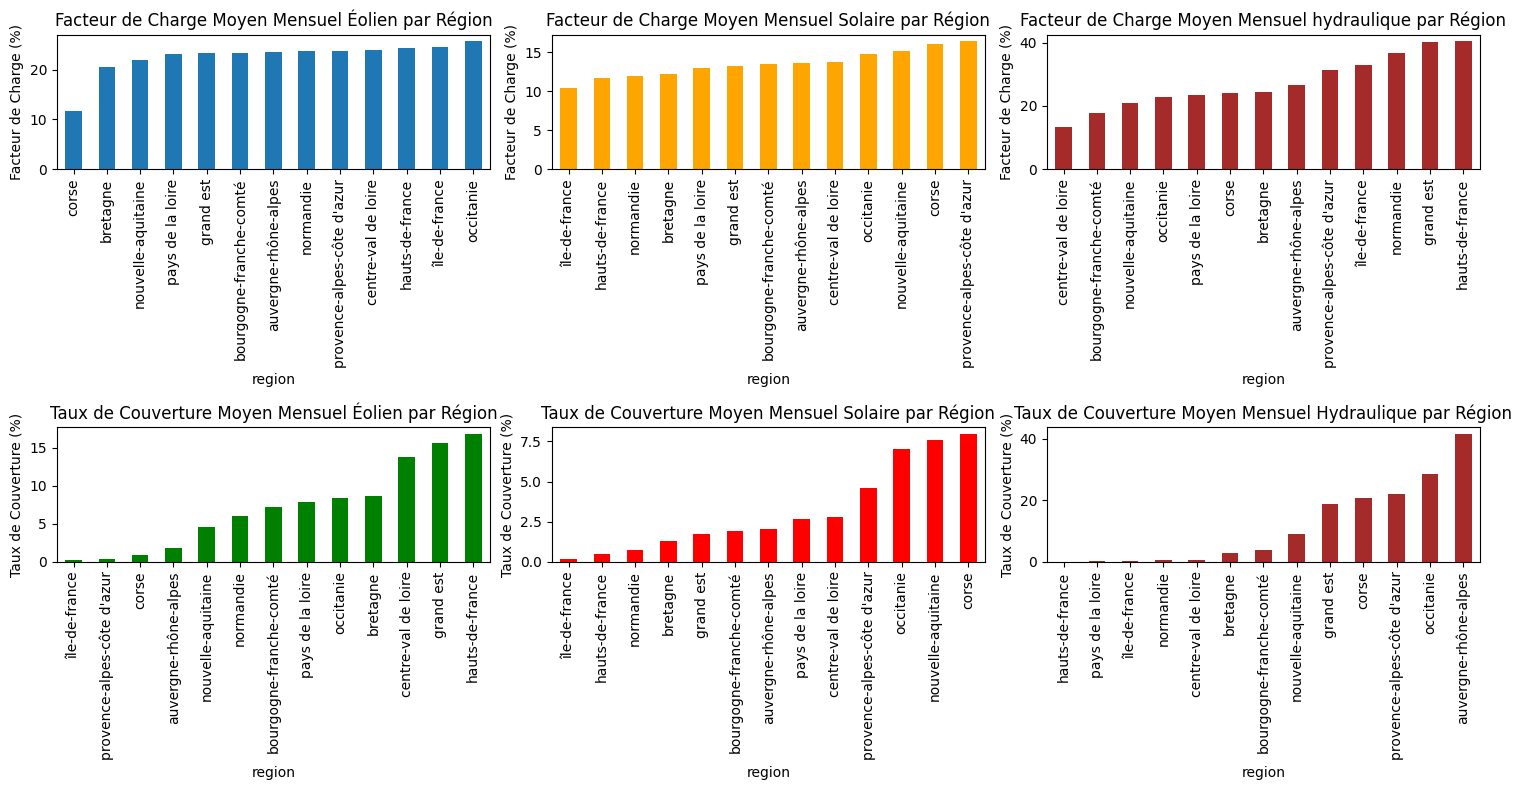

In [58]:
print("Statistiques descriptives:")
print(df_cleaned.describe())

print("\nValeurs manquantes par colonne:")
print(df_cleaned.isnull().sum())

plt.figure(figsize=(15, 8))

# Facteurs de Charge (FC) 
plt.subplot(2, 3, 1)
df_cleaned.groupby('region')['fc_moyen_mensuel_eolien'].mean().sort_values().plot(kind='bar')
plt.title('Facteur de Charge Moyen Mensuel Éolien par Région')
plt.ylabel('Facteur de Charge (%)')

plt.subplot(2, 3, 2)
df_cleaned.groupby('region')['fc_moyen_mensuel_solaire'].mean().sort_values().plot(kind='bar', color='orange')
plt.title('Facteur de Charge Moyen Mensuel Solaire par Région')
plt.ylabel('Facteur de Charge (%)')

plt.subplot(2, 3, 3)
df_cleaned.groupby('region')['fc_moyen_mensuel_hydraulique'].mean().sort_values().plot(kind='bar', color='brown')
plt.title('Facteur de Charge Moyen Mensuel hydraulique par Région')
plt.ylabel('Facteur de Charge (%)')

# Taux de Couverture (TC)
plt.subplot(2, 3, 4)
df_cleaned.groupby('region')['tc_moyen_mensuel_eolien'].mean().sort_values().plot(kind='bar', color='green')
plt.title('Taux de Couverture Moyen Mensuel Éolien par Région')
plt.ylabel('Taux de Couverture (%)')

plt.subplot(2, 3, 5)
df_cleaned.groupby('region')['tc_moyen_mensuel_solaire'].mean().sort_values().plot(kind='bar', color='red')
plt.title('Taux de Couverture Moyen Mensuel Solaire par Région')
plt.ylabel('Taux de Couverture (%)')

plt.subplot(2, 3, 6)
df_cleaned.groupby('region')['tc_moyen_mensuel_hydraulique'].mean().sort_values().plot(kind='bar', color='brown')
plt.title('Taux de Couverture Moyen Mensuel Hydraulique par Région')
plt.ylabel('Taux de Couverture (%)')

plt.tight_layout()
plt.show()


Mean Squared Error (MSE): 3.3873689456632485
Coefficient of Determination (R²): 0.7308779295596977


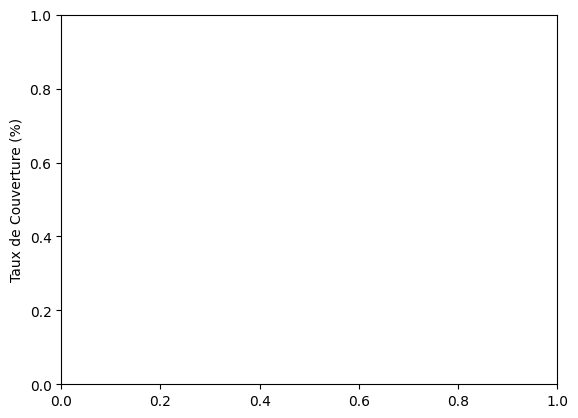

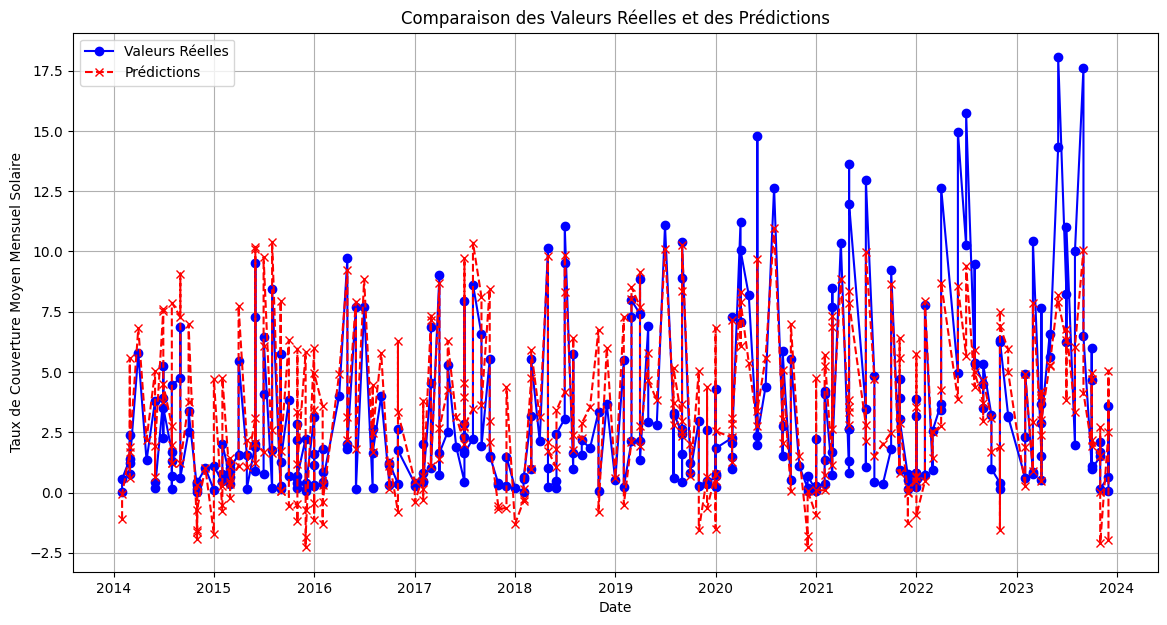

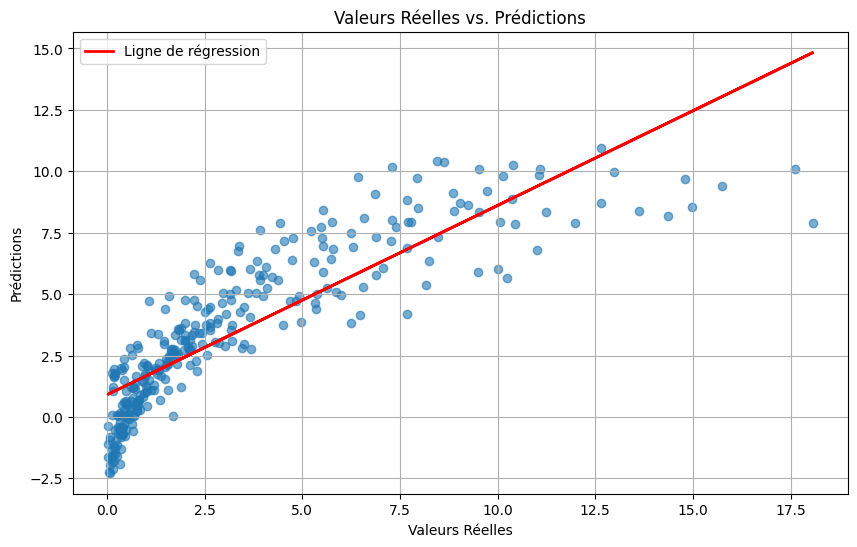

In [79]:
#Entrainer les modèles
df_encoded = pd.get_dummies(df_cleaned, columns=['region'])

plt.ylabel('Taux de Couverture (%)')

X = df_encoded.drop(['code_insee_region','tc_moyen_mensuel_solaire'], axis=1)
y = df_encoded['tc_moyen_mensuel_solaire']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R²): {r2}")

# Comparaison courbe réel et courbe prediction
y_test_sorted = y_test.sort_index()
y_pred_sorted = pd.Series(y_pred, index=y_test.index).sort_index()

plt.figure(figsize=(14, 7))

# Tracer les courbes avec l'index basé sur les dates
plt.plot(y_test_sorted.index, y_test_sorted, label='Valeurs Réelles', color='blue', marker='o', linestyle='-')
plt.plot(y_pred_sorted.index, y_pred_sorted, label='Prédictions', color='red', marker='x', linestyle='--')

plt.title('Comparaison des Valeurs Réelles et des Prédictions')
plt.xlabel('Date')
plt.ylabel('Taux de Couverture Moyen Mensuel Solaire')
plt.legend()
plt.grid(True)
plt.show()


# Ligne de Régression Linéaire
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Valeurs Réelles vs. Prédictions')

reg = LinearRegression()
reg.fit(y_test.values.reshape(-1, 1), y_pred)
y_reg = reg.predict(y_test.values.reshape(-1, 1))

# Tracer la ligne de régression
plt.plot(y_test, y_reg, color='red', linewidth=2, label='Ligne de régression')
plt.legend()
plt.grid(True)
plt.show()

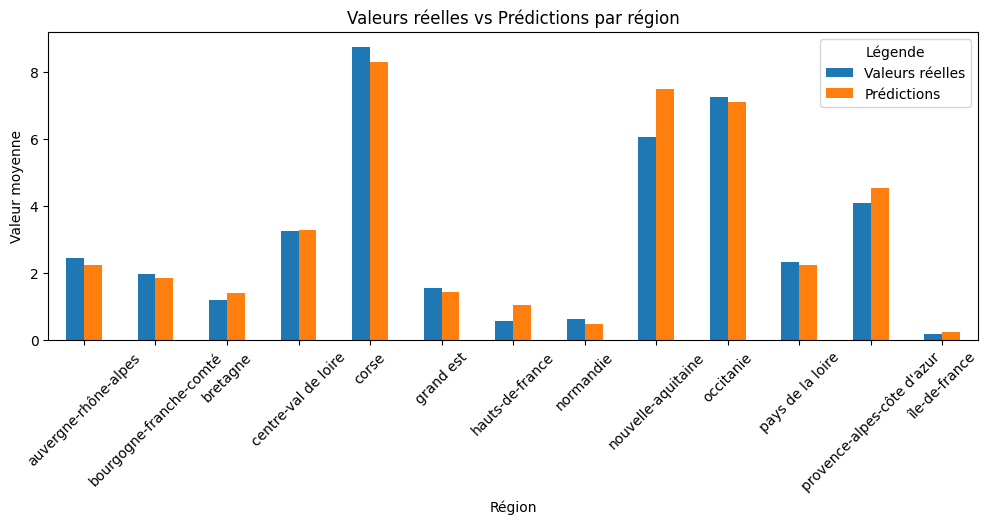

In [65]:
#Diagramme en barres groupées des valeurs réelles vs. prédictions par région 

region_columns = [col for col in X_test.columns if 'region_' in col]

X_test['region'] = X_test[region_columns].idxmax(axis=1).str.replace('region_', '')

results = pd.DataFrame({'Valeurs réelles': y_test, 'Prédictions': y_pred, 'Région': X_test['region']})

mean_results = results.groupby('Région').mean()

mean_results.plot(kind='bar', figsize=(12, 4))

plt.title('Valeurs réelles vs Prédictions par région')
plt.ylabel('Valeur moyenne')
plt.xlabel('Région')
plt.xticks(rotation=45)
plt.legend(title='Légende')
plt.show()

In [81]:
# Créer un DataFrame pour les nouvelles dates de 2024
new_dates = pd.date_range(start='2024-01-01', end='2024-12-01', freq='MS')

# Initialiser un DataFrame vide avec les nouvelles dates comme index
new_data = pd.DataFrame(index=new_dates)

# Ajouter les colonnes nécessaires
new_data['mois'] = new_data.index.month

# Ajouter les colonnes de régions encodées à 0 (ou selon une autre logique si nécessaire)
for col in region_columns:
    new_data[col] = 0

# Assurez-vous que le nouveau DataFrame a les mêmes colonnes que X_train
# Recréer les colonnes manquantes avec des valeurs par défaut
for col in X_train.columns:
    if col not in new_data.columns:
        new_data[col] = 0

# Réordonner les colonnes du DataFrame new_data pour qu'elles soient dans le même ordre que celles de X_train
new_data = new_data[X_train.columns]

# Prédire les valeurs pour 2024
new_data_predictions = model.predict(new_data)

# Ajouter les prédictions au DataFrame
new_data['tc_moyen_mensuel_solaire_prédit'] = new_data_predictions

# Afficher les prédictions
print(new_data[['tc_moyen_mensuel_solaire_prédit']])

            tc_moyen_mensuel_solaire_prédit
2024-01-01                        -0.459020
2024-02-01                        -0.502255
2024-03-01                        -0.545491
2024-04-01                        -0.588726
2024-05-01                        -0.631961
2024-06-01                        -0.675196
2024-07-01                        -0.718431
2024-08-01                        -0.761666
2024-09-01                        -0.804901
2024-10-01                        -0.848137
2024-11-01                        -0.891372
2024-12-01                        -0.934607
